#Fake News Detection Using Ensemble Learning

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow 
import matplotlib.pyplot as plt
import re
import string
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


## Data Preprocessing


In [ ]:
real = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

   
real.insert(4, "label", [0 for i in range(real.shape[0])], False)

fake.insert(4, "label", [1 for i in range(fake.shape[0])], True)

df = pd.concat([real,fake])
df["content"] = df["title"] + " " + df["text"]
df = df[["content","label"]]
df = df.sample(frac = 1)
df=df.dropna()   

df.head(10)

,content,label
11040,NOT OBAMA’S DOJ: FEDS Going After Huma Abedin’...,1
5441,NY Times says Trump campaign had repeated cont...,0
16357,No role for Assad in Syria's future: Tillerson...,0
17813,Spanish foreign minister calls Catalonia's lea...,0
17594,South African Supreme Court upholds reinstatin...,0
9376,WATCH: CNN’s Chris Cuomo Stunned At STUPIDITY ...,1
17995,Florida Man Gives Away Last Generator To Despe...,1
14564,OBAMA’S FIRST VISIT TO A U.S. MOSQUE Raises Qu...,1
9658,FBI likely to interview Clinton soon in emails...,0
5170,Former CIA Director Reveals How Putin Recruit...,1


In [ ]:
x = df["content"]
y = df["label"]
x.shape, y.shape

((44898,), (44898,))

##Data Splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

##TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(x_train)
X_test = vectorization.transform(x_test)

In [ ]:
stats={'algo':[],'acc':[]}


## Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

mlp = MLPClassifier(random_state=1,max_iter=20).fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
pred= mlp.predict(X_test)
acc=mlp.score(X_test, y_test)
print(acc)

0.9920712694877506


In [ ]:
stats['algo'].append('Multi-Layer\nPerceptron')
stats['acc'].append(acc*100)

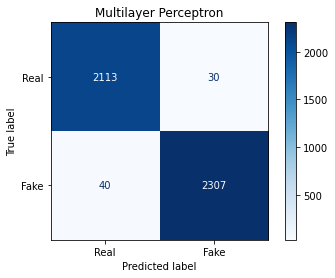

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Real", "Fake"])

cm_display.plot(cmap=plt.cm.Blues)
plt.title("Multilayer Perceptron")
plt.show()

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5296
           1       0.99      0.99      0.99      5929

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
plt.savefig('Multi-Layer-Perceptron.jpg')

In [ ]:
print(stats)

{'algo': ['Multi-Layer Perceptron'], 'acc': [0.9914476614699332]}


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
acc=lr.score(X_test, y_test)
print(acc)

0.9889532293986637

In [ ]:
stats['algo'].append('Logistic\nRegression')
stats['acc'].append(acc*100)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5406
           1       0.99      0.99      0.99      5819

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



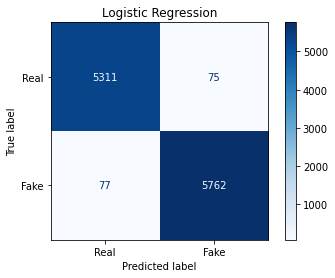

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Real", "Fake"])

cm_display.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression")
plt.show()

In [ ]:
plt.savefig('Logistic_Regression.jpg')

<Figure size 432x288 with 0 Axes>

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
acc=dtc.score(X_test, y_test)
print(acc)

0.9960801781737194

In [ ]:
stats['algo'].append('Decision\nTree')
stats['acc'].append(acc*100)

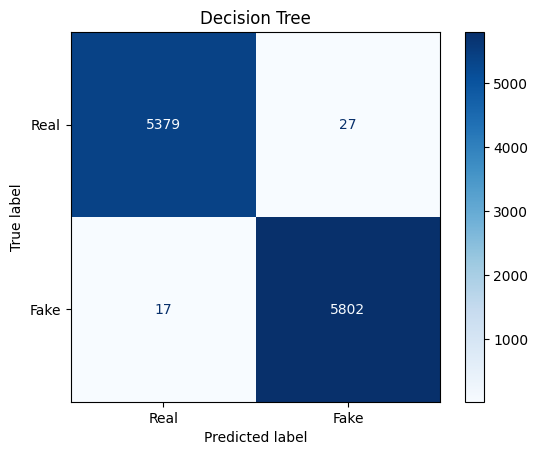

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Real", "Fake"])

cm_display.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree")
plt.show()

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5406
           1       1.00      1.00      1.00      5819

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [ ]:
plt.savefig('Decision_Tree.jpg')

<Figure size 432x288 with 0 Axes>

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, criterion="entropy")
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
acc=rfc.score(X_test, y_test)
print(acc)

0.9857461024498887

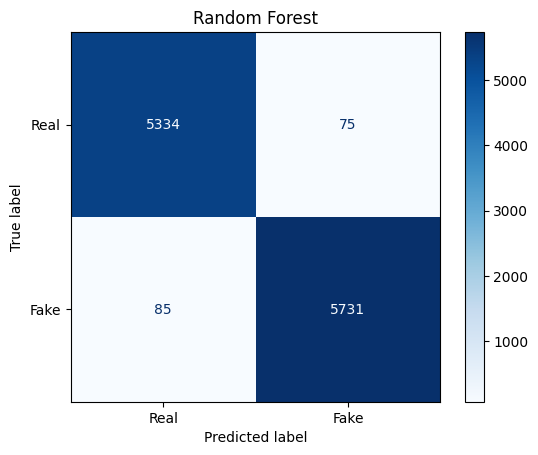

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Real", "Fake"])

cm_display.plot(cmap=plt.cm.Blues)
plt.title("Random Forest")
plt.show()

In [ ]:
stats['algo'].append('Random\nForest')
stats['acc'].append(acc*100)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5406
           1       0.99      0.99      0.99      5819

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
plt.savefig('Random_Forest_Classifier.jpg')

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)
pred= knn.predict(X_test)
acc=knn.score(X_test, y_test)
print(acc)

0.8441674087266251

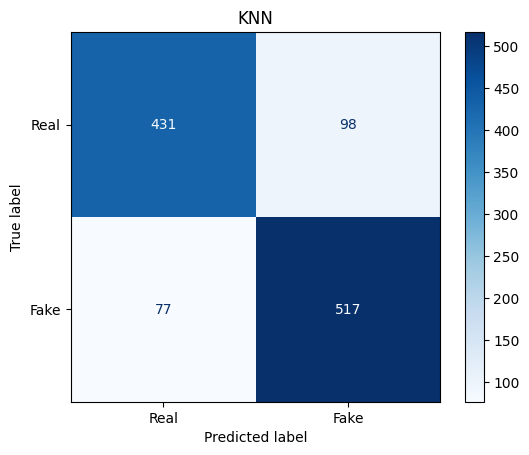

In [ ]:
#k=3
cm = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Real", "Fake"])

cm_display.plot(cmap=plt.cm.Blues)
plt.title("KNN")
plt.show()

In [ ]:
stats['algo'].append('KNN')
stats['acc'].append(acc*100)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       529
           1       0.84      0.87      0.86       594

    accuracy                           0.84      1123
   macro avg       0.84      0.84      0.84      1123
weighted avg       0.84      0.84      0.84      1123



In [ ]:
plt.savefig('KNN.jpg')

## SVM -Linear Kernel

In [ ]:
from sklearn import svm
lsvm = svm.SVC(kernel="linear")
lsvm.fit(X_train, y_train)
pred= lsvm.predict(X_test)
acc=lsvm.score(X_test, y_test)
print(acc)

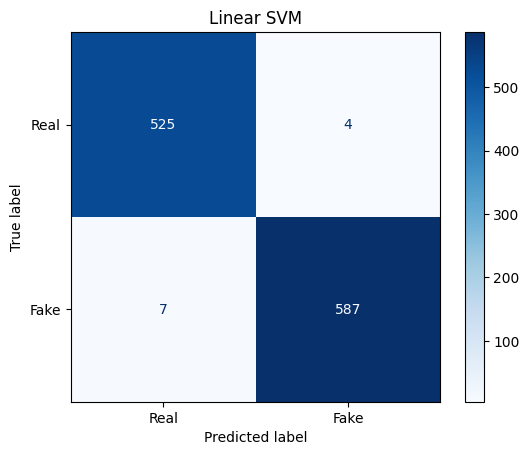

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Real", "Fake"])

cm_display.plot(cmap=plt.cm.Blues)
plt.title("Linear SVM")
plt.show()

In [ ]:
stats['algo'].append('SVM')
stats['acc'].append(acc*100)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2143
           1       0.99      0.99      0.99      2347

    accuracy                           0.99      4490
   macro avg       0.99      0.99      0.99      4490
weighted avg       0.99      0.99      0.99      4490



In [ ]:
plt.savefig('SVM.jpg')

##Plotting the graph for analysis

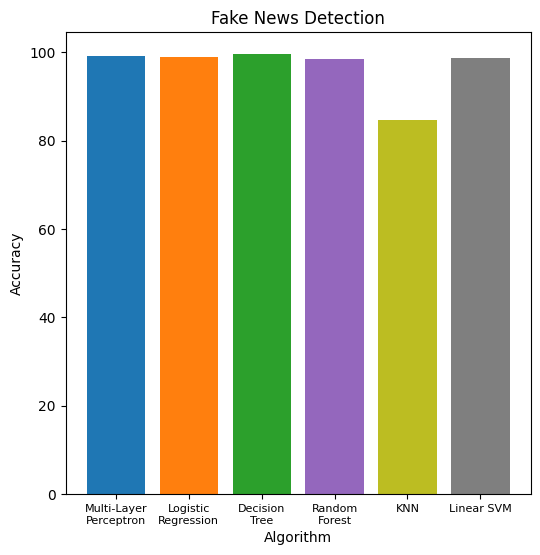

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(stats['algo'], stats['acc'], color=['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
  '#9467bd',
 '#bcbd22',
 '#7f7f7f'])


ax.set_xlabel("Algorithm")
ax.set_ylabel("Accuracy")
ax.set_title("Fake News Detection")
plt.xticks(fontsize=8)

plt.show()